In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('original.csv')

In [3]:
df_original

,# Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE_90,AGE_90,EMPLOYMENT_90,EDUC_LEVEL_90,RESID_STATE_91,AGE_91,EMPLOYMENT_91,EDUC_LEVEL_91,...,EMPLOYMENT_15,EDUC_LEVEL_15,RESID_STATE_17,AGE_17,EMPLOYMENT_17,EDUC_LEVEL_17,RESID_STATE_19,AGE_19,EMPLOYMENT_19,EDUC_LEVEL_19
0,0,1,41.0,2,0,0,41.0,3,0,0,...,0,0,47.0,30,1,12,47.0,31,1,13
1,3,4,41.0,0,0,0,41.0,1,0,0,...,5,12,47.0,27,1,12,47.0,29,6,12
2,0,4,41.0,0,0,0,41.0,0,0,0,...,3,12,47.0,25,3,12,47.0,27,6,12
3,4,1,41.0,5,0,0,41.0,7,0,0,...,1,12,47.0,32,1,12,47.0,34,1,12
4,2,1,41.0,5,0,0,41.0,6,0,0,...,0,0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0,2,19.0,0,0,0,19.0,0,0,0,...,7,10,24.0,18,1,12,24.0,19,3,12
2427,2,2,42.0,5,0,0,42.0,6,0,0,...,0,0,0.0,0,0,0,0.0,0,0,0
2428,0,2,42.0,0,0,0,42.0,0,0,0,...,3,12,48.0,25,3,12,48.0,27,1,12
2429,0,2,42.0,0,0,0,42.0,0,0,0,...,7,11,48.0,20,1,11,48.0,22,1,11


In [4]:
# LFP for women in "Iowa", South Dakota, Wyoming, Montana, Wisconsin, "Kansas", Mississippi  
#one treatment and one control group that is the avg of the control states

In [5]:
# LFP for women in Nebraska
#The only thing that changes is the year, and the state being calculated
col_name = df_original.columns
cols_01_19 = col_name[-40:]
cols_01_19

Index(['RESID_STATE_01', 'AGE_01', 'EMPLOYMENT_01', 'EDUC_LEVEL_01',
       'RESID_STATE_03', 'AGE_03', 'EMPLOYMENT_03', 'EDUC_LEVEL_03',
       'RESID_STATE_05', 'AGE_05', 'EMPLOYMENT_05', 'EDUC_LEVEL_05',
       'RESID_STATE_07', 'AGE_07', 'EMPLOYMENT_07', 'EDUC_LEVEL_07',
       'RESID_STATE_09', 'AGE_09', 'EMPLOYMENT_09', 'EDUC_LEVEL_09',
       'RESID_STATE_11', 'AGE_11', 'EMPLOYMENT_11', 'EDUC_LEVEL_11',
       'RESID_STATE_13', 'AGE_13', 'EMPLOYMENT_13', 'EDUC_LEVEL_13',
       'RESID_STATE_15', 'AGE_15', 'EMPLOYMENT_15', 'EDUC_LEVEL_15',
       'RESID_STATE_17', 'AGE_17', 'EMPLOYMENT_17', 'EDUC_LEVEL_17',
       'RESID_STATE_19', 'AGE_19', 'EMPLOYMENT_19', 'EDUC_LEVEL_19'],
      dtype='object')

In [6]:
Resid_states = [col for col in cols_01_19 if col.startswith("RESID")]
age = [col for col in cols_01_19 if col.startswith("AGE")]
emp = [col for col in cols_01_19 if col.startswith("EMPLOYMENT")]

print(Resid_states)
print(age)
print(emp)

['RESID_STATE_01', 'RESID_STATE_03', 'RESID_STATE_05', 'RESID_STATE_07', 'RESID_STATE_09', 'RESID_STATE_11', 'RESID_STATE_13', 'RESID_STATE_15', 'RESID_STATE_17', 'RESID_STATE_19']
['AGE_01', 'AGE_03', 'AGE_05', 'AGE_07', 'AGE_09', 'AGE_11', 'AGE_13', 'AGE_15', 'AGE_17', 'AGE_19']
['EMPLOYMENT_01', 'EMPLOYMENT_03', 'EMPLOYMENT_05', 'EMPLOYMENT_07', 'EMPLOYMENT_09', 'EMPLOYMENT_11', 'EMPLOYMENT_13', 'EMPLOYMENT_15', 'EMPLOYMENT_17', 'EMPLOYMENT_19']


In [7]:
States = [26, 14, 40, 49, 25, 48, 15, 23]
LFP_Neb_results = pd.DataFrame()
for i in range(len(Resid_states)):
    #LFP for Nebraska
    df_original['working_women_Neb'] = df_original[emp[i]] == 1
    df_original['Resid_Neb'] = df_original[Resid_states[i]] == 26
    LFP_Neb = df_original.groupby(['Resid_Neb'])['working_women_Neb'].mean().reset_index()
    
    LFP_Neb = LFP_Neb[LFP_Neb['Resid_Neb']]
    LFP_Neb['iteration'] = i
    LFP_Neb_results = LFP_Neb_results.append(LFP_Neb, ignore_index=True)
print(LFP_Neb_results)
    #print(LFP_Neb)

   Resid_Neb  working_women_Neb  iteration
0       True           0.028571          0
1       True           0.051852          1
2       True           0.057143          2
3       True           0.174242          3
4       True           0.198347          4
5       True           0.296610          5
6       True           0.423729          6
7       True           0.586207          7
8       True           0.610169          8
9       True           0.686957          9


In [8]:
LFP_IOWA_results = pd.DataFrame()
for i in range(len(Resid_states)):
    #NO LFP for IOWA
    df_original['working_women_IOWA'] = df_original[emp[i]] == 1
    df_original['Resid_IOWA'] = df_original[Resid_states[i]] == 14
    LFP_IOWA = df_original.groupby(['Resid_IOWA'])['working_women_IOWA'].mean().reset_index()
    
    LFP_IOWA = LFP_IOWA[LFP_IOWA['Resid_IOWA']]
    LFP_IOWA['iteration'] = i
    LFP_IOWA_results = LFP_IOWA_results.append(LFP_IOWA, ignore_index=True)
print(LFP_IOWA_results)

Empty DataFrame
Columns: [Resid_IOWA, working_women_IOWA, iteration]
Index: []


In [9]:
LFP_SDK_results = pd.DataFrame()
for i in range(len(Resid_states)):
    #LFP for WYOming
    df_original['working_women_SDK'] = df_original[emp[i]] == 1
    df_original['Resid_SDK'] = df_original[Resid_states[i]] == 49
    LFP_SDK = df_original.groupby(['Resid_SDK'])['working_women_SDK'].mean().reset_index()
    
    LFP_SDK = LFP_SDK[LFP_SDK['Resid_SDK']]
    LFP_SDK['iteration_SDK'] = i
    LFP_SDK_results = LFP_SDK_results.append(LFP_SDK, ignore_index=True)
print(LFP_SDK_results)

   Resid_SDK  working_women_SDK  iteration_SDK
0       True           0.000000              0
1       True           0.066667              1
2       True           0.125000              2
3       True           0.263158              3
4       True           0.166667              4
5       True           0.400000              5
6       True           0.600000              6
7       True           0.600000              7
8       True           0.705882              8
9       True           0.857143              9


In [10]:
LFP_WYO_results = pd.DataFrame()
for i in range(len(Resid_states)):
    # LFP for South_dekota
    df_original['working_women_WYO'] = df_original[emp[i]] == 1
    df_original['Resid_WYO'] = df_original[Resid_states[i]] == 40
    LFP_WYO = df_original.groupby(['Resid_WYO'])['working_women_WYO'].mean().reset_index()
    
    LFP_WYO = LFP_WYO[LFP_WYO['Resid_WYO']]
    LFP_WYO['iteration_WYO'] = i
    LFP_WYO_results = LFP_WYO_results.append(LFP_WYO, ignore_index=True)
print(LFP_WYO_results)

   Resid_WYO  working_women_WYO  iteration_WYO
0       True           0.000000              0
1       True           0.230769              1
2       True           0.250000              2
3       True           0.235294              3
4       True           0.285714              4
5       True           0.470588              5
6       True           0.437500              6
7       True           0.411765              7
8       True           0.312500              8
9       True           0.533333              9


In [11]:
LFP_MNT_results = pd.DataFrame()
for i in range(len(Resid_states)):
    # LFP for Montanna
    df_original['working_women_MNT'] = df_original[emp[i]] == 1
    df_original['Resid_MNT'] = df_original[Resid_states[i]] == 25
    LFP_MNT = df_original.groupby(['Resid_MNT'])['working_women_MNT'].mean().reset_index()
    
    LFP_MNT = LFP_MNT[LFP_MNT['Resid_MNT']]
    LFP_MNT['iteration_MNT'] = i
    LFP_MNT_results = LFP_MNT_results.append(LFP_MNT, ignore_index=True)
print(LFP_MNT_results)

   Resid_MNT  working_women_MNT  iteration_MNT
0       True           0.024390              0
1       True           0.050000              1
2       True           0.075000              2
3       True           0.186047              3
4       True           0.300000              4
5       True           0.450000              5
6       True           0.425000              6
7       True           0.605263              7
8       True           0.761905              8
9       True           0.794872              9


In [12]:
LFP_WIS_results = pd.DataFrame()
for i in range(len(Resid_states)):
    # LFP for Wisconsin
    df_original['working_women_WIS'] = df_original[emp[i]] == 1
    df_original['Resid_WIS'] = df_original[Resid_states[i]] == 25
    LFP_WIS = df_original.groupby(['Resid_WIS'])['working_women_WIS'].mean().reset_index()
    
    LFP_WIS = LFP_WIS[LFP_WIS['Resid_WIS']]
    LFP_WIS['iteration_WIS'] = i
    LFP_WIS_results = LFP_WIS_results.append(LFP_WIS, ignore_index=True)
print(LFP_WIS_results)

   Resid_WIS  working_women_WIS  iteration_WIS
0       True           0.024390              0
1       True           0.050000              1
2       True           0.075000              2
3       True           0.186047              3
4       True           0.300000              4
5       True           0.450000              5
6       True           0.425000              6
7       True           0.605263              7
8       True           0.761905              8
9       True           0.794872              9


In [13]:
date_range = pd.date_range(start='2001-01-01', end='2019-12-31', freq='Y')

In [14]:
LFP_KAN_results = pd.DataFrame()

for i in range(len(Resid_states)):
    # LFP for Kansas
    df_original['working_women_KAN'] = df_original[emp[i]] == 1
    df_original['Resid_KAN'] = df_original[Resid_states[i]] == 15
    LFP_KAN = df_original.groupby(['Resid_KAN'])['working_women_KAN'].mean().reset_index()
    
    LFP_KAN = LFP_KAN[LFP_KAN['Resid_KAN']]
    LFP_KAN['iteration_KAN'] = i
    LFP_KAN_results = LFP_KAN_results.append(LFP_KAN, ignore_index=True)
    #LFP_KAN_results ['year'] = date_range.year
print(LFP_KAN_results)

   Resid_KAN  working_women_KAN  iteration_KAN
0       True                1.0              6
1       True                1.0              8


In [15]:
LFP_MIS_results = pd.DataFrame()
#LFP_MIS_results ['year'] = date_range.year
for i in range(len(Resid_states)):
    # LFP for Mississippi
    df_original['working_women_MIS'] = df_original[emp[i]] == 1
    df_original['Resid_MIS'] = df_original[Resid_states[i]] == 23
    LFP_MIS = df_original.groupby(['Resid_MIS'])['working_women_MIS'].mean().reset_index()
    
    LFP_MIS = LFP_MIS[LFP_MIS['Resid_MIS']]
    LFP_MIS['iteration_MIS'] = i
    LFP_MIS_results = LFP_MIS_results.append(LFP_MIS, ignore_index=True)
print(LFP_MIS_results)

   Resid_MIS  working_women_MIS  iteration_MIS
0       True                0.0              0
1       True                0.0              1
2       True                1.0              2
3       True                0.0              3
4       True                1.0              4
5       True                0.5              5
6       True                1.0              8
7       True                1.0              9


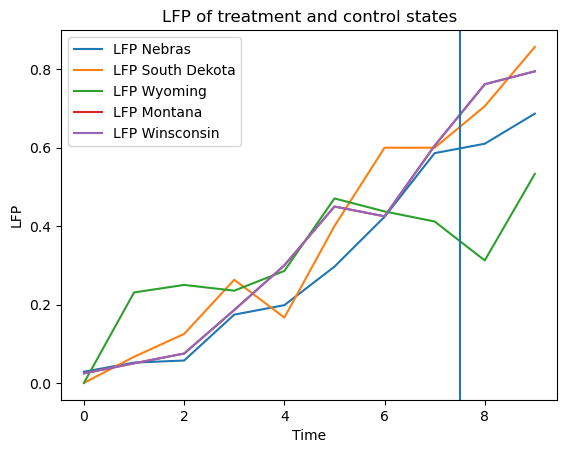

In [16]:
#Checking for parallel trends
plt.plot(LFP_Neb_results['working_women_Neb'], label='LFP Nebras')
#plt.plot(LFP_IOWA_results['working_women_IOWA'], label='LFP IOWA')
plt.plot(LFP_SDK_results['working_women_SDK'], label='LFP South Dekota')
plt.plot(LFP_WYO_results['working_women_WYO'], label='LFP Wyoming')
plt.plot(LFP_MNT_results['working_women_MNT'], label='LFP Montana')
plt.plot(LFP_WIS_results['working_women_WIS'], label='LFP Winsconsin')
#plt.plot(LFP_KAN_results['working_women_KAN'], label='LFP Kansas')
#plt.plot(LFP_MIS_results['working_women_MIS'], label='LFP Mississippi')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('LFP')
plt.title('LFP of treatment and control states')
plt.axvline(x=7.5)

# Add a legend to distinguish the different DataFrames
plt.legend()

# Show the plot
plt.show()
#mean, std, percentire

In [18]:
LFP_Neb_results.describe()

,working_women_Neb,iteration
count,10.000000,10.00000
mean,0.311383,4.50000
std,0.249946,3.02765
min,0.028571,0.00000
25%,0.086418,2.25000
50%,0.247479,4.50000
75%,0.545587,6.75000
max,0.686957,9.00000


In [ ]:
LFP_WIS_results.describe()

In [ ]:
LFP_SDK_results.describe()

In [ ]:
LFP_WYO_results.describe()

In [ ]:
LFP_MNT_results.describe()

In [ ]:
employed = df_original['EMPLOYMENT_19'] == 1 & df_original['RESID_STATE_19'] == 26
unemployed = ((df_original['EMPLOYMENT_19'] == 2) | (df_original['EMPLOYMENT_19'] == 3))& df_original['RESID_STATE_19'] == 26
workingPop = ((df_original['AGE_19'] >= 16) & (df_original['AGE_19'] < 64)

count_emp = employed.sum() #0
count_unemp = unemployed.sum() #0
count_workingPop = workingPop.sum() #0

print(count_emp_19)
print(count_unemp_19)
print(count_workingPop_19)